In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def get_raw_data(filename):
    with open(filename) as file:
        lines = file.readlines()
    return lines


def get_data(filename):
    raw = get_raw_data(filename)
    coord = []
    instructions = []

    for ln in raw:
        line = ln.strip()
        if line.startswith("fold"):
            instructions.append(line.split(" ")[-1])
        else:
            try:
                c_data = line.split(",")
                coord.append((int(c_data[0]), int(c_data[1])))
            except:
                pass

    return (coord, instructions)


In [3]:
"hello world 12".split()[-1]


'12'

In [4]:
coord, instructions = get_data("test")


In [5]:
max_x, max_y = (np.array(coord)[:, 0].max(), np.array(coord)[:, 1].max())
max_x, max_y

(10, 14)

In [6]:
test_grid = np.zeros((max_x + 1, max_y + 1), dtype=np.int8)


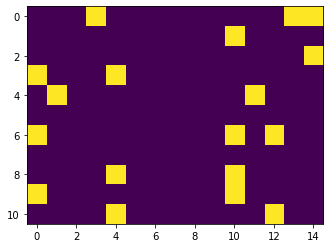

In [7]:
for x, y in coord:
    test_grid[x, y] |= 1
plt.imshow(test_grid)


In [8]:
instructions


['y=7', 'x=5']

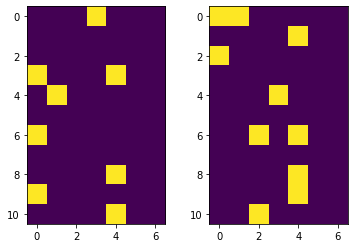

In [9]:
fix, ax = plt.subplots(1,2)

ax[0].imshow(test_grid[:, :7])
ax[1].imshow(np.fliplr(test_grid[:, 8:]))


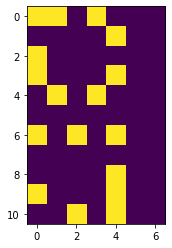

In [10]:
test_grid_1 = test_grid[:, :7] | np.fliplr(test_grid[:, 8:])
plt.imshow(test_grid_1)

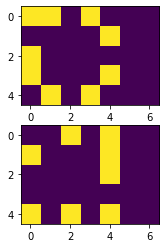

In [11]:
fix, ax = plt.subplots(2,1)

ax[0].imshow(test_grid_1[:5, :])
ax[1].imshow(np.flipud(test_grid_1[6::]))


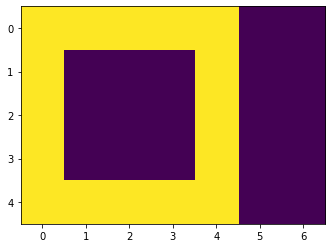

In [12]:
test_grid_2 = test_grid_1[:5, :] | np.flipud(test_grid_1[6::])
plt.imshow(test_grid_2)

In [13]:
test_grid_2.sum()

16

In [14]:
coord, instructions = get_data("input")
instructions

['x=655',
 'y=447',
 'x=327',
 'y=223',
 'x=163',
 'y=111',
 'x=81',
 'y=55',
 'x=40',
 'y=27',
 'y=13',
 'y=6']

In [15]:
def fold_x(g:np.array, val):
    return g[:val, :] | np.flipud(g[val+1::, :])
    
def fold_y(g:np.array, val):
    return g[:, :val] | np.fliplr(g[:, val+1:])

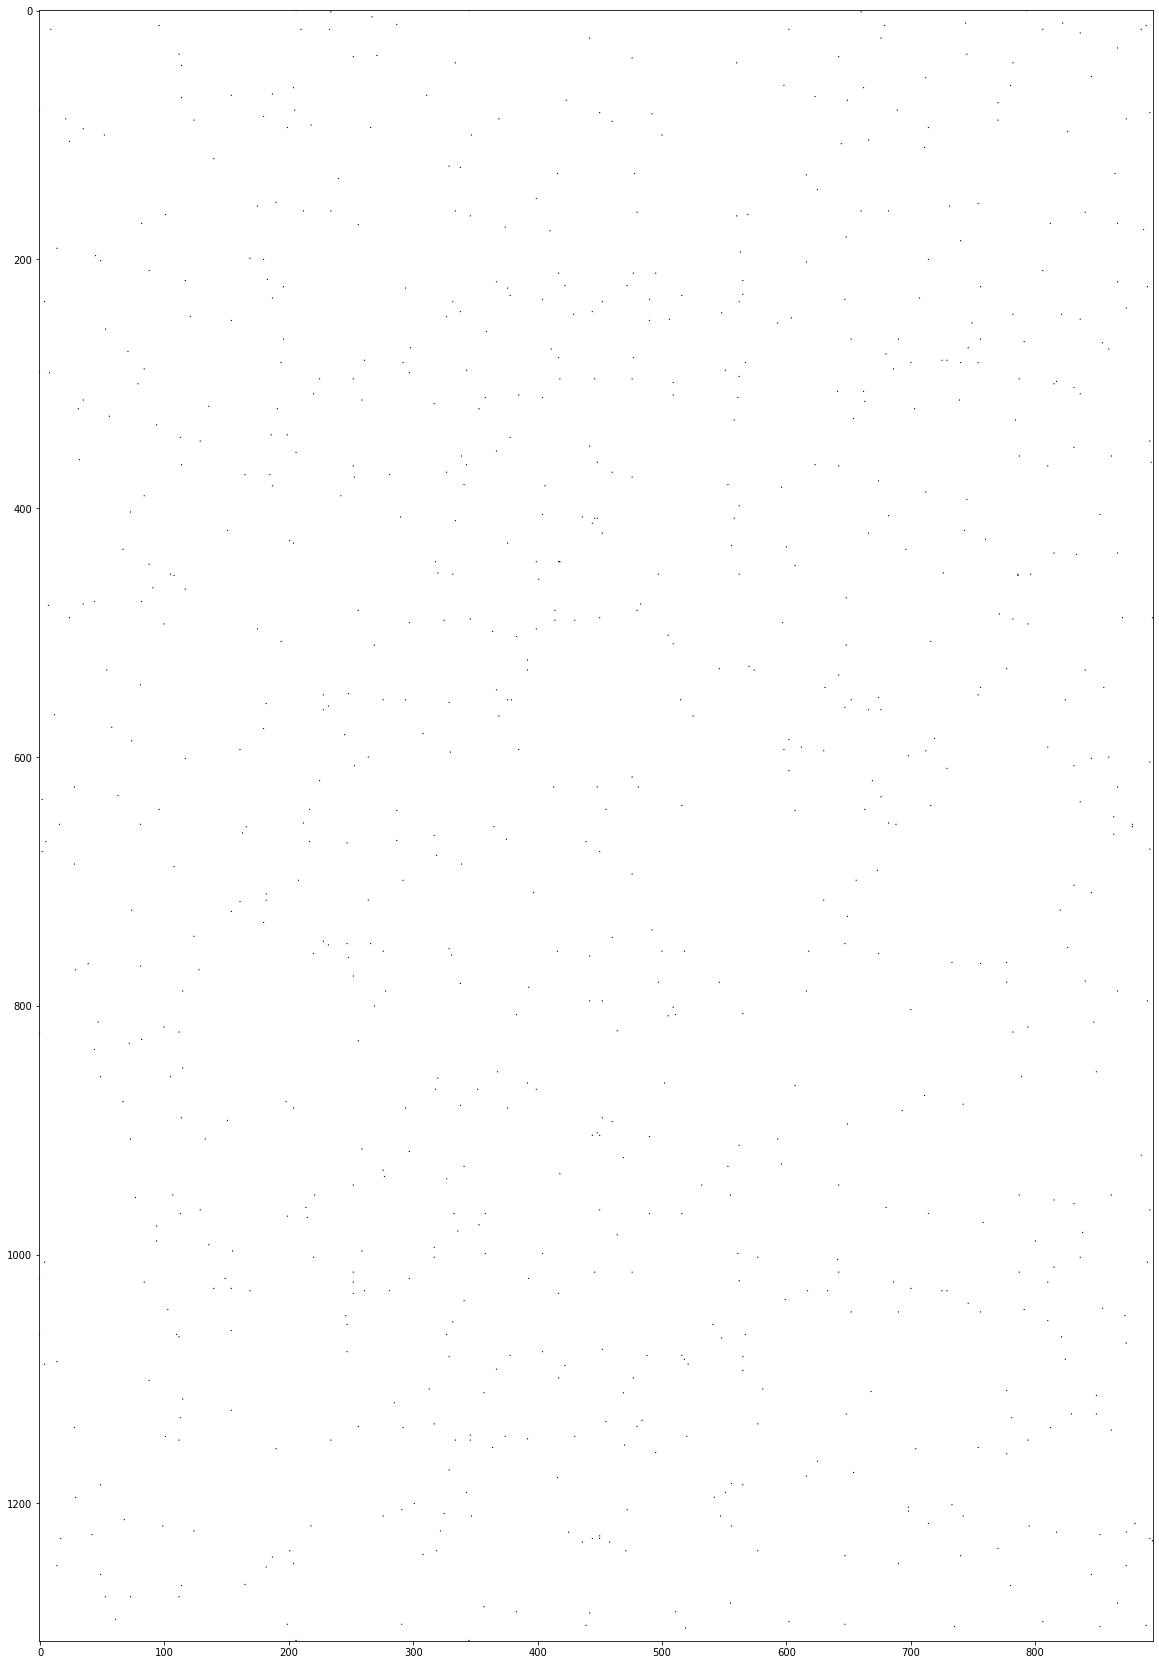

In [16]:
def new_grid(coord):
    max_x, max_y = (np.array(coord)[:, 0].max(), np.array(coord)[:, 1].max())
    g = np.zeros((max_x + 1, max_y + 1), dtype=np.int8)
    for x, y in coord:
        g[x, y] |= 1
    return g

fig, ax = plt.subplots()
fig.set_size_inches(30,30)
ax.imshow(new_grid(coord), cmap='Greys')

In [17]:
instructions[0]

'x=655'

In [18]:
grid = new_grid(coord)
grid.shape

(1311, 895)

682

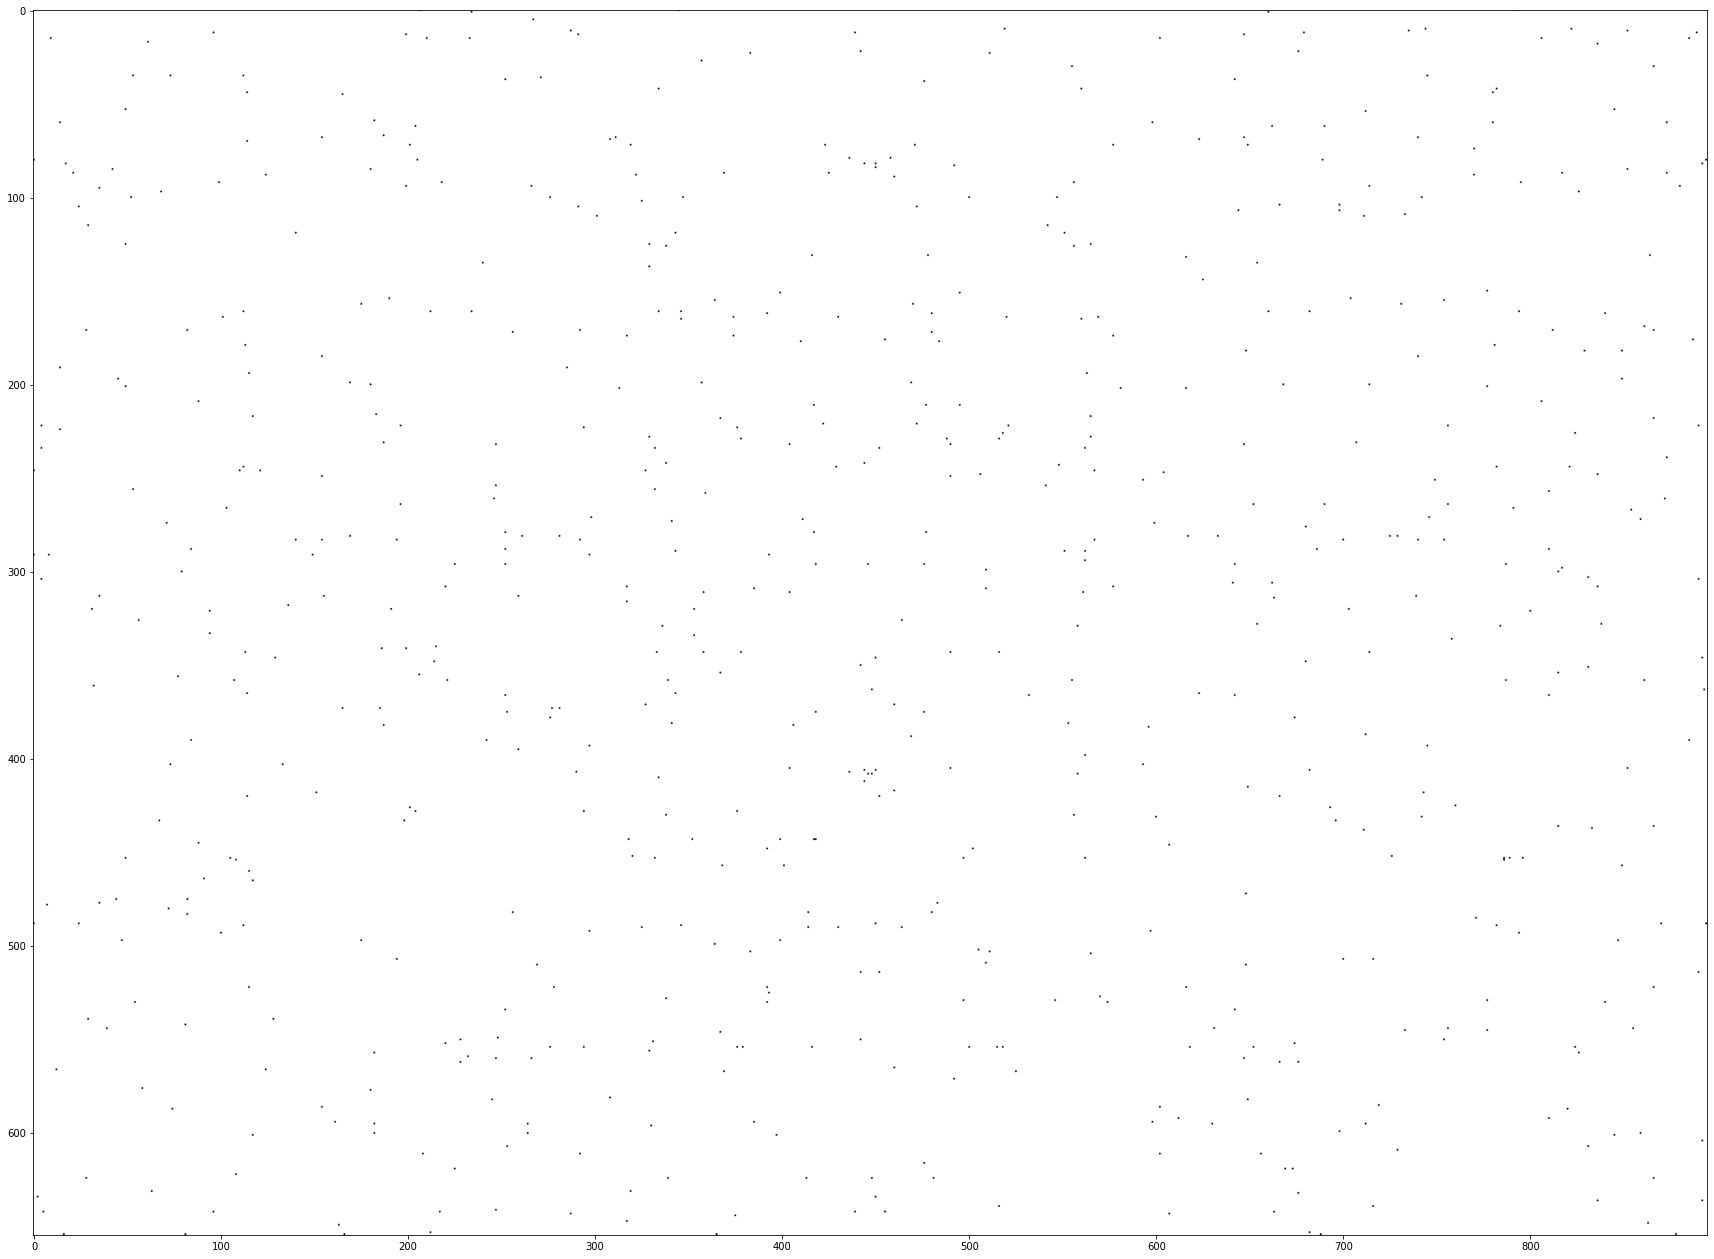

In [19]:
first_fold = fold_x(grid, 655)

fig, ax = plt.subplots()
fig.set_size_inches(30,30)
ax.imshow(first_fold, cmap='Greys')

first_fold.sum()

In [20]:
grid = new_grid(coord)

for inst in instructions:
    t, val = inst.split("=")
    match t:
        case 'x':
            grid = fold_x(grid, int(val))
        case 'y':
            grid = fold_y(grid, int(val))
            # print('y')

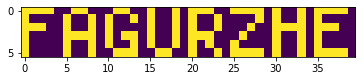

In [21]:
plt.imshow(np.transpose(grid))